we'll build a CNN using Keras to use it classifying thousands of pictures in six different categories

Data link : https://www.kaggle.com/puneet6060/intel-image-classification

#Import Libraries

In [2]:
# !pip install opencv-python
# !pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
import glob as gb

import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
from sklearn.metrics import classification_report, precision_recall_fscore_support



#define the path ( to swtich it between jupyter notebook & kaggle kernel)

In [5]:
os.getcwd()

'd:\\Machine Diploma\\material\\project'

In [6]:
train_path='D:\Machine Diploma\\material\\project\\archive\\seg_train\\seg_train'
test_path='D:\Machine Diploma\\material\\project\\archive\\seg_test\\seg_test'
pred_path='D:\Machine Diploma\\material\\project\\archive\\seg_pred\\seg_pred'

# Open Folders

now let's first check the Train folder to have a look to its content

In [7]:
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path +'/'+folder+'/*.jpg'))
    print(f'For training data , found {len(images)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


In [8]:
for folder in os.listdir(test_path):
    images=gb.glob(pathname=str(test_path +'/'+folder+'/*.jpg'))
    print(f'For training data , found {len(images)} in folder {folder}')

For training data , found 437 in folder buildings
For training data , found 474 in folder forest
For training data , found 553 in folder glacier
For training data , found 525 in folder mountain
For training data , found 510 in folder sea
For training data , found 501 in folder street


In [9]:
for folder in os.listdir(pred_path):
    images=gb.glob(pathname=str(test_path +'/'+folder+'/*.jpg'))
    print(f'For training data , found {len(images)} in folder {folder}')

For training data , found 0 in folder 10004.jpg
For training data , found 0 in folder 10005.jpg
For training data , found 0 in folder 10012.jpg
For training data , found 0 in folder 10013.jpg
For training data , found 0 in folder 10017.jpg
For training data , found 0 in folder 10021.jpg
For training data , found 0 in folder 1003.jpg
For training data , found 0 in folder 10034.jpg
For training data , found 0 in folder 10038.jpg
For training data , found 0 in folder 10040.jpg
For training data , found 0 in folder 10043.jpg
For training data , found 0 in folder 10045.jpg
For training data , found 0 in folder 10047.jpg
For training data , found 0 in folder 10048.jpg
For training data , found 0 in folder 10052.jpg
For training data , found 0 in folder 10054.jpg
For training data , found 0 in folder 10059.jpg
For training data , found 0 in folder 10060.jpg
For training data , found 0 in folder 10066.jpg
For training data , found 0 in folder 10069.jpg
For training data , found 0 in folder 100

In [10]:
files = gb.glob(pathname= str(pred_path +'/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


#Checking Images
now we need to heck the images sizes , to know ow they looks like

since we have 6 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

In [11]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def get_code(n):
    for x,y in code.items():
        if n==y:
            return x

In [12]:
get_code(3)

'mountain'

In [13]:
sizes=[]
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path +'/'+folder+'/*.jpg'))

    for img in images:
        image=plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(134, 150, 3)        2
(136, 150, 3)        2
(108, 150, 3)        2
(105, 150, 3)        1
(97, 150, 3)         1
(131, 150, 3)        1
(147, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(110, 150, 3)        1
(149, 150, 3)        1
(140, 150, 3)        1
dtype: int64

In [14]:
sizes=[]
for folder in os.listdir(test_path):
    images=gb.glob(pathname=str(test_path +'/'+folder+'/*.jpg'))

    for img in images:
        image=plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(72, 150, 3)        1
(131, 150, 3)       1
(81, 150, 3)        1
dtype: int64

In [15]:
size = []
files = gb.glob(pathname= str(pred_path +'/*.jpg'))
for file in files:
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(133, 150, 3)       1
(139, 150, 3)       1
(108, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(143, 150, 3)       1
(129, 150, 3)       1
(100, 150, 3)       1
(112, 150, 3)       1
(126, 150, 3)       1
(374, 500, 3)       1
dtype: int64

ok , since almost all of pictures are 150,150,3 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

#Reading Images
now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily

let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [16]:
import os
import glob as gb
import matplotlib.pyplot as plt
import cv2

x_train = []
y_train = []
num_images_per_class = 100  
for folder in os.listdir(train_path):
    images = gb.glob(pathname=str(train_path + '/' + folder + '/*.jpg'))
    
    images = images[:num_images_per_class]

    for img in images:
        image = plt.imread(img)
        image = cv2.resize(image, (100, 100))
        x_train.append(list(image))
        y_train.append(code[folder])


In [17]:
print(f'we have {len(x_train)} items in X_train')

we have 600 items in X_train


also we have have a look to random pictures in X_train , and to adjust their title using the y value

In [18]:
import os
import glob as gb
import matplotlib.pyplot as plt
import cv2

x_test = []
y_test = []
num_images_per_class = 100  

for folder in os.listdir(test_path):
    images = gb.glob(pathname=str(test_path + '/' + folder + '/*.jpg'))
    
    images = images[:num_images_per_class]

    for img in images:
        image = plt.imread(img)
        image = cv2.resize(image, (100, 100))
        x_test.append(list(image))
        y_test.append(code[folder])


In [19]:
print(f'we have {len(x_test)} items in x_test')

we have 600 items in x_test


In [20]:
x_pred = []
files = gb.glob(pathname= str(pred_path + '/*.jpg'))
for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image , (100,100))
    x_pred.append(list(image_array))

In [21]:
print(f'we have {len(x_pred)} items in X_pred')

we have 7301 items in X_pred


In [22]:
x_train=np.array(x_train)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_test=np.array(y_test)

x_pred=np.array(x_pred)

In [23]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

print(x_pred.shape)

(600, 100, 100, 3)
(600, 100, 100, 3)
(600,)
(600,)
(7301, 100, 100, 3)


In [125]:

# Model definition
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(32, activation='relu', kernel_size=(3, 3), padding='same', input_shape=(100, 100, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Conv2D(64, activation='relu', kernel_size=(3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Conv2D(128, activation='tanh', kernel_size=(3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Conv2D(256, activation='tanh', kernel_size=(3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Conv2D(512, activation='tanh', kernel_size=(3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(6, activation='softmax')  
])

In [126]:
KerasModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [127]:
model=KerasModel.fit(x_train, y_train, epochs=15,batch_size=64, verbose=1)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 993ms/step - accuracy: 0.2882 - loss: 5.7336
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1000ms/step - accuracy: 0.4589 - loss: 3.6209
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5111 - loss: 2.7192
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5382 - loss: 2.4294
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 993ms/step - accuracy: 0.5839 - loss: 2.1339
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 954ms/step - accuracy: 0.5776 - loss: 2.0302
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 972ms/step - accuracy: 0.6231 - loss: 1.8787
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6777 - loss: 1.8509
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 978ms/step - accuracy: 0.6917 - loss: 1.7562
Epoch 10/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7141 - loss: 1.6742
Epoch 11/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7209 - loss: 1.5756
Epoch 12/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - ac

In [128]:
loss,accuracy=KerasModel.evaluate(x_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.7042 - loss: 1.7245


In [130]:
y_result = KerasModel.predict(x_pred)

y_result

229/229 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step


array([[7.33229667e-02, 2.82152444e-02, 5.38677990e-01, 1.66870832e-01,
        1.78303391e-01, 1.46096004e-02],
       [1.08189076e-01, 3.26997191e-02, 4.78160083e-02, 1.90483972e-01,
        6.08669698e-01, 1.21415127e-02],
       [3.14994186e-01, 1.02205179e-03, 9.61253978e-03, 3.20897624e-02,
        8.16837593e-04, 6.41464591e-01],
       ...,
       [2.51328070e-02, 1.30131617e-02, 1.51661504e-02, 1.12648800e-01,
        8.31415534e-01, 2.62341509e-03],
       [2.93963039e-05, 9.91692185e-01, 1.86782843e-03, 2.35276866e-06,
        6.40397472e-03, 4.24892414e-06],
       [2.34841555e-03, 1.06604602e-04, 1.25126168e-03, 8.07430843e-06,
        5.23558083e-06, 9.96280372e-01]], dtype=float32)

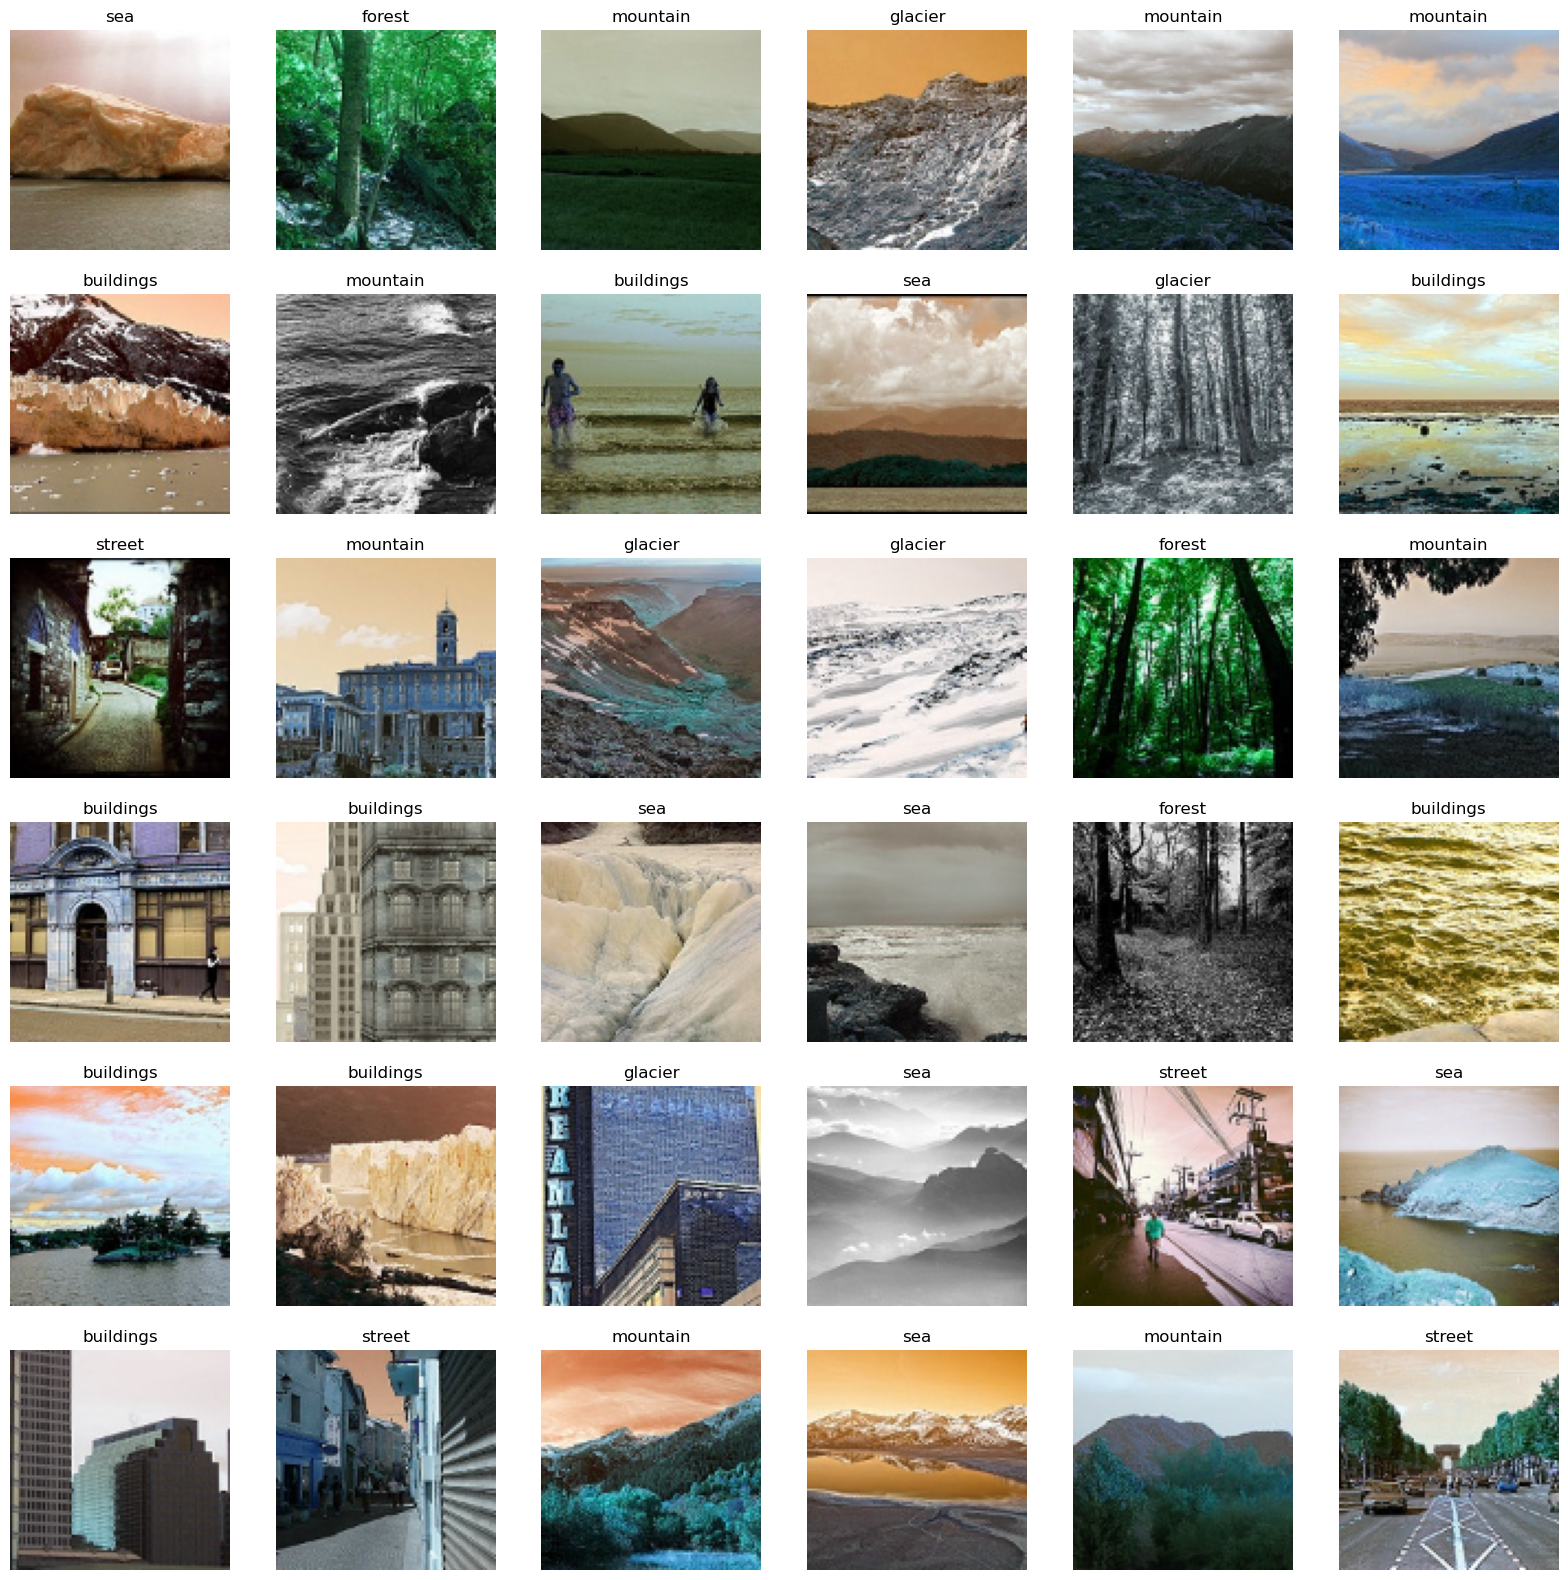

In [131]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

In [154]:
from tensorflow.keras.models import load_model
KerasModel.save('model.h5')


In [132]:
y_pred = KerasModel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

labels = list(code.values())
target_names = list(code.keys())
report = classification_report(y_test, y_pred_classes, labels=labels, target_names=target_names)

print(report)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, labels=labels, target_names=target_names)

print(report)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, labels=labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
              precision    recall  f1-score   support

   buildings       0.44      0.78      0.57       100
      forest       0.94      0.79      0.86       100
     glacier       0.61      0.70      0.65       100
    mountain       0.53      0.60      0.56       100
         sea       0.61      0.17      0.27       100
      street       0.75      0.62      0.68       100

    accuracy                           0.61       600
   macro avg       0.65      0.61      0.60       600
weighted avg       0.65      0.61      0.60       600

              precision    recall  f1-score   support

   buildings       0.44      0.78      0.57       100
      forest       0.94      0.79      0.86       100
     glacier       0.61      0.70      0.65       100
    mountain       0.53      0.60      0.56       100
         sea       0.61      0.17      0.27       100
      street       0.75      0.62      0.68       100

    accuracy                        

In [145]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

num_classes = 6

xx_train = np.array(x_train[:600])  
xx_test = np.array(x_test[:600])    
yy_train = to_categorical(np.array(y_train[:600]), num_classes=num_classes)
yy_test = to_categorical(np.array(y_test[:600]), num_classes=num_classes)

print(xx_train.shape)
print(xx_test.shape)
print(yy_train.shape)
print(yy_test.shape)

print(x_pred.shape)  

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow(
    xx_train,
    yy_train,
    batch_size=32
)

val_generator = val_datagen.flow(
    xx_test,
    yy_test,
    batch_size=32
)


(600, 100, 100, 3)
(600, 100, 100, 3)
(600, 6)
(600, 6)
(7301, 100, 100, 3)


In [146]:
def vgg16_architecture():
    base_model = VGG16(include_top=False, weights="imagenet", input_shape=(100, 100, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.80)(x)

    output = Dense(num_classes, activation='softmax')(x)

    VGG16_model = Model(inputs=base_model.input, outputs=output)

    VGG16_model.summary()

    optimizer = Adam(learning_rate=0.001)
    VGG16_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return VGG16_model

In [147]:
def vgg19_architecture():
    from keras.applications import VGG19
    base_model = VGG19(include_top=False, weights="imagenet", input_shape=(100, 100, 3))
    from keras.layers import BatchNormalization, Dropout

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.80)(x)

    output = Dense(num_classes, activation='softmax')(x)

    VGG19_model = Model(inputs=base_model.input, outputs=output)

    VGG19_model.summary()

    optimizer = Adam(learning_rate=0.001)
    VGG19_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return VGG19_model

In [148]:
def resnet152v2_architecture():
    from keras.applications import ResNet152V2
    base_model = ResNet152V2(include_top=False, weights="imagenet", input_shape=(100, 100, 3))
    from keras.layers import BatchNormalization, Dropout

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.80)(x)

    output = Dense(num_classes, activation='softmax')(x)

    ResNet152V2_model = Model(inputs=base_model.input, outputs=output)

    ResNet152V2_model.summary()

    optimizer = Adam(learning_rate=0.001)
    ResNet152V2_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return ResNet152V2_model

In [149]:
def inception_v3_architecture():
    from keras.applications import InceptionV3
    
    from keras.layers import BatchNormalization, Dropout

    base_model = InceptionV3(include_top=False, weights="imagenet", input_shape=(100, 100, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.80)(x)

    output = Dense(num_classes, activation='softmax')(x)

    InceptionV3_model = Model(inputs=base_model.input, outputs=output)

    InceptionV3_model.summary()

    optimizer = Adam(learning_rate=0.001)
    InceptionV3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return InceptionV3_model

In [150]:
def evaluate_model(model, x_test, yy_test):
    loss, accuracy = model.evaluate(x_test, yy_test)
    print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}")
    return loss, accuracy

    # cm = confusion_matrix(y_true, y_pred)
    # print("Confusion Matrix:")
    # print(cm)

    # cr = classification_report(y_true, y_pred, target_names=[f'class_{i}' for i in range(3)])
    # print("Classification Report:")
    # print(cr)

    # return cm, cr


 

In [151]:
models = {
     "VGG16": vgg16_architecture,
     "VGG19": vgg19_architecture,
     "ResNet152V2": resnet152v2_architecture,
     "InceptionV3": inception_v3_architecture
}

for model_name, model_func in models.items():
    print(f"Training {model_name}...")
    model = model_func()
    model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=15  # Adjust epochs as needed
    )
    print(f"Evaluating {model_name}...")
    loss, accuracy = evaluate_model(model, xx_test, yy_test)
    print(f"{model_name} evaluation complete.")
    print(f"Accuracy: {accuracy}\n")
    print("_______________________________________________________________________")

Training VGG16...


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,814 (56.15 MB)

 Trainable params: 14,718,790 (56.15 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.1969 - loss: 2.4901 - val_accuracy: 0.1667 - val_loss: 1264.7489
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.2878 - loss: 2.0024 - val_accuracy: 0.1667 - val_loss: 63.8972
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 109s 6s/step - accuracy: 0.3465 - loss: 1.8403 - val_accuracy: 0.1667 - val_loss: 34.0972
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 110s 6s/step - accuracy: 0.2977 - loss: 1.8072 - val_accuracy: 0.1717 - val_loss: 7.6190
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.3119 - loss: 1.7126 - val_accuracy: 0.3167 - val_loss: 2.8022
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.3167 - loss: 1.7378 - val_accuracy: 0.3700 - val_loss: 1.7977
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.3391 - loss: 1.6625 - val_accuracy: 0.1883 - val_loss: 4.9064
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 116s 6s/step - accuracy: 0.3645 - loss: 1.5982 - val_accuracy: 0.2567

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 20,029,510 (76.41 MB)

 Trainable params: 20,028,486 (76.40 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.1632 - loss: 2.7503 - val_accuracy: 0.1667 - val_loss: 119.3892
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.2374 - loss: 2.2943 - val_accuracy: 0.1317 - val_loss: 5380.8496
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.2805 - loss: 2.1736 - val_accuracy: 0.2517 - val_loss: 11.8271
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.2944 - loss: 2.1029 - val_accuracy: 0.3683 - val_loss: 1.5364
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - accuracy: 0.2898 - loss: 1.9231 - val_accuracy: 0.2383 - val_loss: 2.6761
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.2810 - loss: 2.1116 - val_accuracy: 0.1900 - val_loss: 4.7037
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - accuracy: 0.3220 - loss: 1.7725 - val_accuracy: 0.3917 - val_loss: 18.9221
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - accuracy: 0.3012 - loss: 1.6213 - val_accuracy: 0.3567 - v

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 106, 106,  │          0 │ input_layer_27[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 50, 50,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 52, 52,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 25,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 25, 25,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 25, 25,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 25,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 25,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 25,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 27, 27,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 25,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 25,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 25,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 25,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 25, 25,    │          0 │ conv2_block1_0_c

 Total params: 58,352,134 (222.60 MB)

 Trainable params: 58,204,294 (222.03 MB)

 Non-trainable params: 147,840 (577.50 KB)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 287s 9s/step - accuracy: 0.2807 - loss: 3.2772 - val_accuracy: 0.1667 - val_loss: 789252.1875
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 186s 10s/step - accuracy: 0.3031 - loss: 1.8431 - val_accuracy: 0.1667 - val_loss: 51865628.0000
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 182s 10s/step - accuracy: 0.3498 - loss: 1.6199 - val_accuracy: 0.1667 - val_loss: 4332831.0000
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 183s 10s/step - accuracy: 0.3232 - loss: 1.9614 - val_accuracy: 0.1667 - val_loss: 35001.0781
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 183s 10s/step - accuracy: 0.3639 - loss: 1.5915 - val_accuracy: 0.1700 - val_loss: 5348.4692
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 182s 10s/step - accuracy: 0.3788 - loss: 1.7586 - val_accuracy: 0.1783 - val_loss: 98516.5469
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 184s 10s/step - accuracy: 0.3751 - loss: 1.5737 - val_accuracy: 0.2017 - val_loss: 38206.6484
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 184s 10s/step - accuracy: 0.3380 -

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_114 (Conv2D) │ (None, 49, 49,    │        864 │ input_layer_28[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 49, 49,    │         96 │ conv2d_114[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 49, 49,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_115 (Conv2D) │ (None, 47, 47,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 47,    │         96 │ conv2d_115[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 47, 47,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_116 (Conv2D) │ (None, 47, 47,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 47,    │        192 │ conv2d_116[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 47, 47,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_117   │ (None, 23, 23,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_117 (Conv2D) │ (None, 23, 23,    │      5,120 │ max_pooling2d_11… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 23, 23,    │        240 │ conv2d_117[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 23, 23,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_118 (Conv2D) │ (None, 21, 21,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 21,    │        576 │ conv2d_118[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 21, 21,    │          0 │ batch_normalizat

 Total params: 21,823,270 (83.25 MB)

 Trainable params: 21,784,742 (83.10 MB)

 Non-trainable params: 38,528 (150.50 KB)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.2161 - loss: 3.7538 - val_accuracy: 0.1667 - val_loss: 26.1641
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.2760 - loss: 2.7791 - val_accuracy: 0.1667 - val_loss: 7.5380
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2885 - loss: 2.3250 - val_accuracy: 0.1817 - val_loss: 2.3371
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3403 - loss: 2.0277 - val_accuracy: 0.2083 - val_loss: 2.2728
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3540 - loss: 2.0613 - val_accuracy: 0.1700 - val_loss: 2986.5149
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4125 - loss: 1.8223 - val_accuracy: 0.1633 - val_loss: 264.9341
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.3670 - loss: 2.0462 - val_accuracy: 0.2700 - val_loss: 1.7412
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4390 - loss: 1.9345 - val_accuracy: 0.2000 - val

In [152]:
def generate_confusion_matrix_and_metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

    labels = np.unique(y_true)
    target_names = [f'class_{label}' for label in labels]
    report = classification_report(y_true, y_pred_classes, labels=labels, target_names=target_names)
    print("Classification Report:")
    print(report)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_classes, labels=labels, average='weighted')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1_score:.4f}')

    return cm, report, precision, recall, f1_score

In [153]:
models = {
    "VGG16": vgg16_architecture,
    "VGG19": vgg19_architecture,
    "ResNet152V2": resnet152v2_architecture,
    "InceptionV3": inception_v3_architecture
}

for model_name, model_func in models.items():
    print(f"Evaluating {model_name}...")
    cm, report, precision, recall, f1_score = generate_confusion_matrix_and_metrics(model, xx_test, yy_test)
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")
    print("_______________________________________________________________________")

Evaluating VGG16...
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 543ms/step
Confusion Matrix:
[[  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       100
     class_1       0.17      1.00      0.29       100
     class_2       0.00      0.00      0.00       100
     class_3       0.00      0.00      0.00       100
     class_4       0.00      0.00      0.00       100
     class_5       0.00      0.00      0.00       100

    accuracy                           0.17       600
   macro avg       0.03      0.17      0.05       600
weighted avg       0.03      0.17      0.05       600

Precision: 0.0278
Recall: 0.1667
F1-score: 0.0476
Precision: 0.0278, Recall: 0.1667, F1-score: 0.0476
_______________________________________________________________________
Evaluating VGG19.

c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packa

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step
Confusion Matrix:
[[  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       100
     class_1       0.17      1.00      0.29       100
     class_2       0.00      0.00      0.00       100
     class_3       0.00      0.00      0.00       100
     class_4       0.00      0.00      0.00       100
     class_5       0.00      0.00      0.00       100

    accuracy                           0.17       600
   macro avg       0.03      0.17      0.05       600
weighted avg       0.03      0.17      0.05       600

Precision: 0.0278
Recall: 0.1667
F1-score: 0.0476
Precision: 0.0278, Recall: 0.1667, F1-score: 0.0476
_______________________________________________________________________
Evaluating ResNet152V2...


c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packa

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step
Confusion Matrix:
[[  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       100
     class_1       0.17      1.00      0.29       100
     class_2       0.00      0.00      0.00       100
     class_3       0.00      0.00      0.00       100
     class_4       0.00      0.00      0.00       100
     class_5       0.00      0.00      0.00       100

    accuracy                           0.17       600
   macro avg       0.03      0.17      0.05       600
weighted avg       0.03      0.17      0.05       600

Precision: 0.0278
Recall: 0.1667
F1-score: 0.0476
Precision: 0.0278, Recall: 0.1667, F1-score: 0.0476
_______________________________________________________________________
Evaluating InceptionV3...


c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packa

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step
Confusion Matrix:
[[  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0 100   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00       100
     class_1       0.17      1.00      0.29       100
     class_2       0.00      0.00      0.00       100
     class_3       0.00      0.00      0.00       100
     class_4       0.00      0.00      0.00       100
     class_5       0.00      0.00      0.00       100

    accuracy                           0.17       600
   macro avg       0.03      0.17      0.05       600
weighted avg       0.03      0.17      0.05       600

Precision: 0.0278
Recall: 0.1667
F1-score: 0.0476
Precision: 0.0278, Recall: 0.1667, F1-score: 0.0476
_______________________________________________________________________


c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KimoStore\anaconda3\lib\site-packa